# Predicting Heating Load for Buildings
This notebook is a public version of a __project that I worked on for my DataX class__. In this project, I use the data set to make predictions about heating load using multivariable linear, logistic classifiers, and Support Vector Machine.

### Data:
__Data Source__:
The Data file is available on the same github folder this ipynb file is uploaded to, and is named: __Energy.csv__ 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

Credits: Much of the ideas for what to implement in this project are from the GSIs for the DataX course. I add to their original idea in this notebook.

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* `X1`	Relative Compactness
* `X2`	Surface Area 
* `X3`	Wall Area 
*  `X4`	Roof Area 
*  `X5`	Overall Height 
* `X6`  Orientation 
*  `X7`	Glazing Area 
*  `X8`	Glazing Area Distribution 
*  `y1`	Heating Load 

In [4]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('Building_Heating.csv')
print(df1.isna().sum())
df1.describe()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


Yes! The data is cleaned really well already! Now I just want to check to see at first glance how the each of the variables interacts with Y1.

### Feature Scaling
Prior to jumping into our models, it's always a good practice to scale our features, whether it be normalizing them or taking the log(feature). For our first predictor, a linear regression, the way the data looks, scaling it shouldn't make too much of a difference, but it might be useful when we move to more complex predictors.

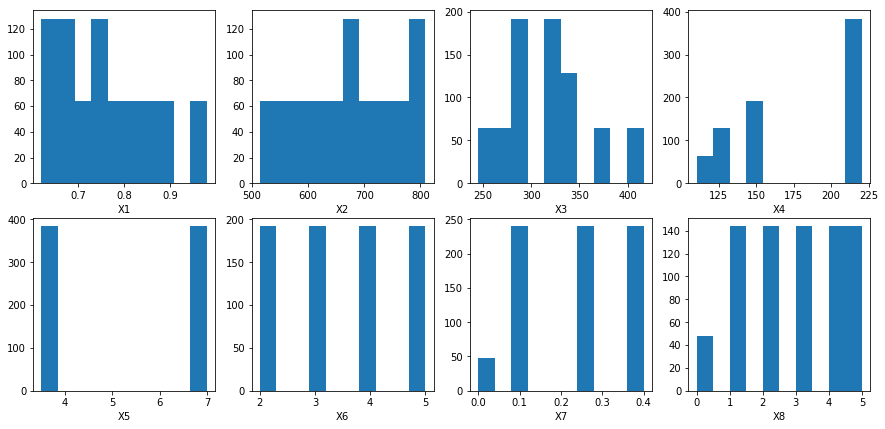

In [5]:
fig, ax = plt.subplots(2,4, figsize = (15,7))
r = 0
c = 0
for col in df1.columns:
    if col == 'Y1':
        break
    ax[r,c].hist(col, data = df1);
    ax[r,c].set_xlabel(col);
    if c ==3:
        c = 0
        r = 1
    else:
        c+= 1

#here's how one would do it with for loops :D

In [6]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

scaled=scaler.fit_transform(df1)
dfscaled = pd.DataFrame(scaled, columns = df1.columns)

#Splitting scaled data into training, test
Xs = dfscaled.iloc[:,:-1]

#Testing it without scaling features too 
#There's no need to scale the target Variable.
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]
x_strain, x_stest, y_train, y_test = train_test_split(Xs, Y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

/Users/rvenguswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rvenguswamy/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Linear Regression
The previous graphs that plotted a Least-Squared Regressions Line seem reasonable and suggests a linear regression could be a good, easy first step. From there we can move to more fancy models that might do a better job of capturing some of those breaks in the graph, like what occurs for `X5`. First, I'm going to make a linear model and score it. Because the output is continuous we'll use a regression model instead of a classifier. First things first, we'll split out data 80% training, 20% test.

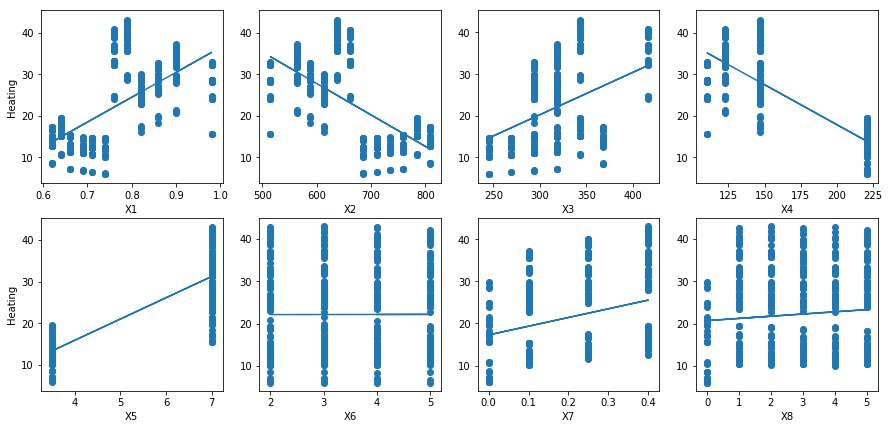

In [8]:
#could have probably used a for loop here... but it was more aesthetic on plot to manually decide where to place each graph
from sklearn import linear_model
fig, ax = plt.subplots(2,4, figsize = (15,7))

name = 'X1'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[0,0].plot(col, LinearModel.predict(col))
ax[0,0].scatter(col,y_train)
ax[0,0].set_xlabel(name)
ax[0,0].set_ylabel("Heating")

name = 'X2'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[0,1].plot(col, LinearModel.predict(col))
ax[0,1].scatter(col,y_train)
ax[0,1].set_xlabel(name)

name = 'X3'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[0,2].plot(col, LinearModel.predict(col))
ax[0,2].scatter(col,y_train)
ax[0,2].set_xlabel(name)

name = 'X4'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[0,3].plot(col, LinearModel.predict(col))
ax[0,3].scatter(col,y_train)
ax[0,3].set_xlabel(name)

name = 'X5'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[1,0].plot(col, LinearModel.predict(col))
ax[1,0].scatter(col,y_train)
ax[1,0].set_xlabel(name)
ax[1,0].set_ylabel("Heating")

name = 'X6'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[1,1].plot(col, LinearModel.predict(col))
ax[1,1].scatter(col,y_train)
ax[1,1].set_xlabel(name)
name = 'X7'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[1,2].plot(col, LinearModel.predict(col))
ax[1,2].scatter(col,y_train)
ax[1,2].set_xlabel(name)

name = 'X8'
col = np.array([x_train[name]])
col = col.reshape(len(col[0]),1)
LinearModel = linear_model.LinearRegression()
LinearModel.fit(col,y_train)
ax[1,3].plot(col, LinearModel.predict(col))
ax[1,3].scatter(col,y_train)
ax[1,3].set_xlabel(name);



In [9]:
#Metric for error for our model, root mean squared error
from sklearn.metrics import mean_squared_error
def RMSEfn(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [10]:
#Training the linear model on x_train/y_train 
#and then using the model to score both the training data and the test data

LinearModel = linear_model.LinearRegression()
LinearModel.fit(x_strain,y_train)
predicted = LinearModel.predict(x_strain)
print('RMSE for LSRM training (scaled): ', RMSEfn(y_train, predicted))
testpredict = LinearModel.predict(x_stest)
print('RMSE for LRSM Test (scaled): ', RMSEfn(y_test,testpredict))

RMSE for LSRM training (scaled):  2.893118785420839
RMSE for LRSM Test (scaled):  3.025423582773619


This makes sense for the RMSE for the test to be very slightly higher than that for the training data. We did use the training data to fit the model after all but it seems that the overfitting is minimal as this is only a linear model after all.

## Support Vector Machine (SVM) Regressor
Now we've done a simple linear model, I want to try a SVM model to see if I can achieve better results. Because we're working with continuous data, I'll be using an SVM regressor. As I build my SVM model, I want to be conscious of overfitting. I discovered that the C parameter does a lot in terms of reducing error. The C parameter represents how "wide" the vector that separates each of the classes will be in a typical SVM classifier. Similarly for a regressor, a higher C value means thinner margins. I plotted various values of C (log) relative log RMSE to see what value of C I should use.

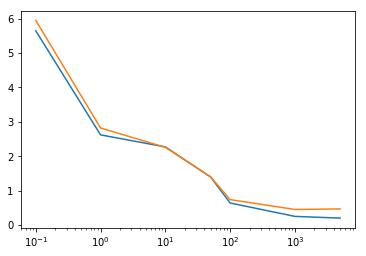

In [40]:
from sklearn import svm

c = [0.1,1,10,50,100,100,1000, 5000]
SVMtrainerror = []
SVMtesterror = []
for x in c:
    SVMmodel = svm.SVR(kernel = 'rbf', gamma = 'auto', C = x)
    SVMmodel.fit(x_strain,y_train)
    
    SVMtrainerror.append(RMSEfn(y_train, SVMmodel.predict(x_strain)))
    SVMtesterror.append(RMSEfn(y_test, SVMmodel.predict(x_stest)))
    
    
plt.plot(c,SVMtrainerror)
plt.plot(c,SVMtesterror)
plt.xscale('log')
plt.title = "RMSE vs. C Param for SVM Regressor"
plt.ylabel = "RMSE"
plt.xlabel = "Log C Value"

From this graph we see that for C value ≈ 100, the error (RMSE) for the training and test set begin to diverge a bit. As the blue line (training data) goes lower, the error for the test starts to plateau shortly after, suggesting overfitting begins to occur for values above 100. For my final model, I'll use this value for C prior to a large divergence in RMSE from training and test to be conservative against overfitting.

In [41]:

SVMmodel = svm.SVR(kernel = 'rbf', gamma = 'auto', C = 100)
#C represents how "wide" we want our line in the SVM to be.
#A small C represents wide margins at the cost of accuracy while a high C represents tight margins.
SVMmodel.fit(x_strain,y_train)
print('RMSE for training: ', RMSEfn(y_train, SVMmodel.predict(x_strain)))
print('RMSE for training: ', RMSEfn(y_test, SVMmodel.predict(x_stest)))

RMSE for training:  0.6471903160591559
RMSE for training:  0.744534705042214


Thank you for looking at my project on predicting Heating Levels for buildings based on their building attributes!